# **Maximum Likelihood Estimation**

#### **The way to know the parameters of your model**

When fitting real-world data into a model, one of the most crucial actions is estimating its parameters. Maximum Likelihood Estimation (MLE) provides powerful, general and theoretically sound estimators with reliable uncertainty estimates. It covers from linear regression up to more complex models. In this guide I will not only explain how it works, but also some usual scenerios were you would *likely* use it through Python examples.

## **1. How Does The Method Work?**

We will start by covering how MLE works, from intuition to calculation. For instance, imagine you are analyzing the height of a sample of people and you suspect it is generated by a normal distribution, but you do not know its respective parameters $\theta=(\mu, \sigma)$, where $\mu$ is the mean and $\sigma$ is the standard deviation.

### **1.1. Mathematical Explanation**

The "likelihood" is the probability of observing your actual data, assuming specific values for the parameters within $\theta$.

#### **Step 1: Assume a Model**

Because of what I said previously, you have supposed the heights come from a normal distribution and you would like to *estimate* $\mu$ and $\sigma$.

#### **Step 2: Write the Likelihood Function**

- For a single data point (person in the current example), $x_1$, from a normal distribution, this is just the value of the probability density function (PDF) (or probability mass function (PMF) in case of a discrete random variable): $P_{\theta}(x_1)$

- For the entire sample, $x_1,\dots,x_n$, the likelihood function $L_\theta$ is the joint probability of observing all your data points. If we assume the observations are independent (e.g. the height of a child it is not influenced by the height of its parents), this is the product of the individual probabilities:

$$L_\theta(x_1,\dots,x_n)=P_{\theta}(x_1)\times\cdots\times P_{\theta}(x_n)$$

It is important to note that **$L_\theta$ is a function of the parameters** ($\theta=(\mu,\sigma)$ from the example), not the data ($x_1,\dots,x_n$).

#### **Step 3: The "Maximum" Part - Find the Peak**

Now, you ask: "For which values of $\mu$ and $\sigma$ is this likelihood function $L_\theta$ the largest?". We find this maximum mathematically. Because products can be messy, we almost always work with the **Log-Likelihood** function. Since log is a monotonically increasing function, maximizing the log-likelihood is equivalent to maximizing the likelihood. Taking the log turns the product into a sum, which is much easier to differentiate:

$$\ln(L_\theta(x_1,\dots,x_n))=\ln(P_{\theta}(x_1))+\cdots+\ln(P_{\theta}(x_n))$$

#### **Step 4: Use Calculus to Find the Maximum**

To find the maximum of a function, we take its derivative with respect to the parameters, set it to zero and solve. In our example, we would need:
$$\frac{\partial\ln L_\theta}{\partial\mu}=0,\quad \frac{\partial\ln L_\theta}{\partial\sigma}=0.$$

In this case, the values of $\mu$ and $\sigma$ that satisfy these equations are the **Maximum Likelihood Estimates (MLE's)**, often denoted $\hat{\mu}_{MLE}$ and $\hat{\sigma}_{MLE}$, or simply $\hat{\mu}$ and $\hat{\sigma}$.

When the size of the sample, $n$, is large or $P_\theta$ has a complex form, we usually use software like Python or R for the MLE's. We will come back to this example later.

### **1.2. A Toy Example**

Now imagine you flip a coin 10 times and get 7 heads and 3 tails. You want to estimate the probability of getting heads: $p$.

1. **Assume a Model:** We assume the data is generated by a Bernoulli distribution of parameter $\theta=p$.

2. **Write the Likelihood Function:** The probability of getting a head given $p$ is $P_p(x)=p$, while the probability of getting a tail is $P_p(x)=1-p$. Thus, the likelihood function is
$$L_p(x_1,\dots,x_{10})=p^7(1-p)^3$$

3. **Find the Maximum:** The log of $L$ in this case is
$$\ln L_p(x_1,\dots,x_{10})=7\ln p + 3\ln (1-p)$$

4. **Use Calculus to Find the Maximum:** By differentiating, we obtain
$$\frac{\partial\ln L_p}{\partial p}=\frac{7}{p}-\frac{3}{1-p}=0\iff\frac{7}{p}=\frac{3}{1-p}=0\iff 7(1-p)=3p\iff 10p=7\iff p=0.7$$

Thus, the Maximum Likelihood Estimate for the probability of heads is $\hat{p}=0.7$. This makes perfect intuitive sense! The most likely coin, given 7 heads in 10 flips, is one that is biased to land on heads 70% of the time.

## **2. Building Models in Python**

As I stated, MLE is not a model itself; it's an estimation method for the parameters of a model. Applying when you have already decided on the structure of your model based on your data analysis is the most common case.

### **2.1. Normal Distribution**

Returning to the example of heights, you have the following dataset of 500 (independent) people:

In [3]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

In [5]:
# creating the height dataset
mean = 173
std = 15
size = 500

np.random.seed(42) # control randomness
heights = np.random.normal(mean, std, size)

ser = pd.Series(data=heights)
ser.head()

0    180.450712
1    170.926035
2    182.715328
3    195.845448
4    169.487699
dtype: float64

As you might note, the dataset has been created from random numbers following a normal distrution with $\mu=173$ and $\sigma=15$, both units in centimeters. However, as a data analyst, you will not usually know the parameters and will have to estimate them. The first insight of normal distribution usually comes from observing the histogram:

Text(0, 0.5, 'Count')

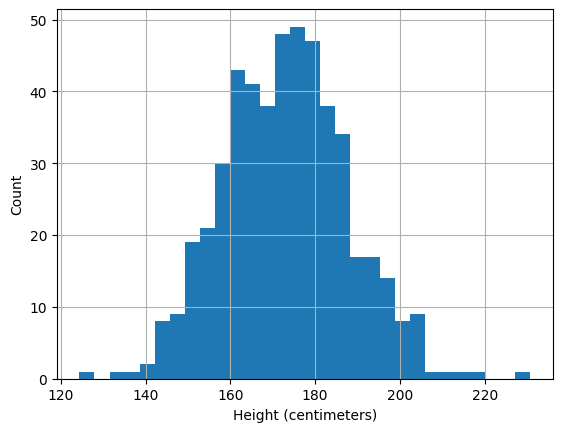

In [15]:
ax = plt.subplots()[1]
ser.hist(bins=30, ax=ax)
ax.set_xlabel('Height (centimeters)')
ax.set_ylabel('Count')

Actually, the sample mean and the sample standard deviation (with $n-1$ degrees of freedom) are good (and unbiased) estimators for the population mean and population standard deviation, respectively. With `pandas`'s function `describe`, it can be done in a single line of code:

In [17]:
ser.describe()[1:3]

mean    173.102570
std      14.718799
dtype: float64

As we can see, the sample mean is close to the actual value (173), the same for the sample standard deviation (15). Despite all, it is still a good example to explain MLE is usually done through the Python library `scipy`. There are two different approaches we will explain.

#### **An implicit approach**
As it name suggests, we do not construct the log-likelihood function at any time. You will likely use this approach when studying well-know distributions such as the normal one. `scipy.stats` offers this functionality through `fit`:

In [ ]:
# implicit approach
data = ser.values   # the values from the sample
mu_mle, sigma_mle = stats.norm.fit(data)
mu_mle, sigma_mle

(np.float64(173.10256991882972), np.float64(14.704072544949403))

As we can see, $\hat{\mu}_{MLE},\,\hat{\sigma}_{MLE}$ are practically the same values as the sample mean and the sample standard deviation. Additionally, we have used `norm` to specify we want to fit a model generated by a normal distribution. You can check [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) for all the probability distributions it includes (binomial, exponential, etc.).

#### **An explicit approach**
When the probability distribution gets more complex, we have no other choice than to construct the log-likelihood function $\ln L$ on Python explicitly. It usually requires some mathematical manipulation. In our example, since we suspect heigths are generated by a normal distribution with unknown parameters $\theta=(\mu, \sigma)$, the PDF for an observation $x_i$ is

$$P_\theta(x_i)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right).$$

Again, by assuming the observations are independent, we get

$$L_\theta(x_1,\dots,x_{500})=\prod_{i=1}^{500}\frac{1}{\sigma\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right)=\left(\frac{1}{2\pi\sigma^2}\right)^{500/2}\prod_{i=1}^{500}\exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right).$$

Taking the logarithm, we obtain

$$\ln(L_\theta(x_1,\dots,x_{500})) = -\frac{500}{2}\ln(2\pi) - \frac{500}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{500} (x_i - \mu)^2.$$

Since $-(500/2)\ln(2\pi)$ is a constant term, maximizing $\ln L_\theta$ is equivalent to maximizing

$$l_\theta(x_1,\dots,x_{500})=-\left(\frac{500}{2}\ln(\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{500} (x_i - \mu)^2\right).$$

We usually call *objective function* to the function we want to maximize or minimize depending on the context. In this case, $l_\theta$ is the objective function we want to maximize. However, `scipy.optimize` only has a `minimize` function. This means it will minimize $l_\theta$ instead of maximizing. Since maximizing a (scalar) function $f$ is equivalent to minimizing $-f$, we will consider $-l_\theta$ the objective function to minimize within the example. Now we are able to able define it on Python:

In [ ]:
# define the objective function for 500 observations
def objective_function1 (params, data):
    '''params contains the parameters we want to estimate,
    while data is the sample of 500 observations'''

    if not len(data) == 500:
        raise TypeError('data must be a 500-element array.')

    mu_mle, sigma_mle = params
    addend1 = 500/2*np.log(sigma_mle**2)
    addend2 = 1/(2*sigma_mle**2)*np.sum((data-mu_mle)**2)
    return addend1 + addend2

Note the number of height observations to introduce within `objective_function1` must be 500, otherwise the objective function would be defined wrongly. For an arbitrary number of observations $n$ we can definite in this way:

In [ ]:
# define the objective function for n observations
def objective_function2 (params, data):
    '''params contains the parameters we want to estimate,
    while data is a sample of n observations'''

    mu_mle, sigma_mle = params
    n = len(data)
    addend1 = n/2*np.log(sigma_mle**2)
    addend2 = 1/(2*sigma_mle**2)*np.sum((data-mu_mle)**2)
    return addend1 + addend2

As long as `len(data)` is equal to 500, both objective functions are equivalent. But, in practice, the latter is highly preferred. Now we can compute the MLE's:

In [ ]:
data = ser.values
x_0 = [173.0, 15.0]
estimations = minimize(objective_function1, x_0, args=(data,))
estimations.x

array([173.10257136,  14.70407173])

As you can note, they are practically the same as the ones from the implicit approach.

### **2.2. Linear Regression**
Simple linear regression is popular because it is a straightforward, interpretable and efficient method for understanding and predicting relationships between two variables variables: $x_i$ and $y_i$ for any observation $i$. It is assumed they are related linearly:
$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i\,\text{ where }\epsilon_i\sim\mathcal{N}(\mu,\sigma)\text{ (normally distributed errors)}.$$

In order to estimate the parameters $\beta_0$ and $\beta_1$, Ordinary Least Squares (OLS) is the common method. But OLS turns out to be mathematically equivalent to MLE if you assume the errors are normally distributed.